In [1]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import MACCSkeys
from rdkit.Avalon import pyAvalonTools
from rdkit.Chem import AllChem
from rdkit.Chem import Lipinski
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
import seaborn as sns

import matplotlib.pyplot as plt


In [4]:
import pandas as pd
csv_file_path = 'Hepatoprotection.csv'
df = pd.read_csv(csv_file_path)

In [5]:
#导入全部数据
act_smi=[]
inact_smi=[]
for index, row in df.iterrows():
    if row['Label'] == 0:
        inact_smi.append(row['standardize_smiles'])
    else:
        act_smi.append(row['standardize_smiles'])
np.save('act_smi.npy',act_smi)
np.save('inact_smi.npy',inact_smi)

In [6]:
#convert to mol
act_mol = [Chem.MolFromSmiles(x) for x in act_smi]
inact_mol = [Chem.MolFromSmiles(x) for x in inact_smi]


In [7]:
#计算描述符，保存成列表--act
act_results = []
for mol in act_mol:
    des_list = ['MolWt', 'NumHAcceptors', 'NumHDonors', 'MolLogP', 'NumRotatableBonds','TPSA']
    calculator = MoleculeDescriptors.MolecularDescriptorCalculator(des_list)
    cal = calculator.CalcDescriptors(mol)
    act_results.append(cal)
print(len(act_results))
print(act_results[0])

634
(356.2390000000001, 8, 6, -0.31390000000000023, 5, 198.88999999999996)


In [8]:
inact_results = []
for mol in inact_mol:
    des_list = ['MolWt', 'NumHAcceptors', 'NumHDonors', 'MolLogP', 'NumRotatableBonds','TPSA']
    calculator = MoleculeDescriptors.MolecularDescriptorCalculator(des_list)
    cal = calculator.CalcDescriptors(mol)
    inact_results.append(cal)
#print(len(inact_results))
#print(inact_results[0])

In [9]:
act_dic = {}
act_mw = []
act_nha = []
act_nhd = []
act_mlp = []
act_nrb = []
act_tpsa = []
for a,b,c,d,e,f in act_results:
    act_mw.append(a)
    act_nha.append(b)
    act_nhd.append(c)
    act_mlp.append(d)
    act_nrb.append(e)
    act_tpsa.append(f)
    
act_dic['MolWt'] = act_mw
act_dic['NumHAcceptors'] = act_nha
act_dic['NumHDonors'] = act_nhd
act_dic['MolLogP'] = act_mlp
act_dic['NumRotatableBonds'] = act_nrb
act_dic['TPSA'] = act_tpsa

In [10]:
inact_dic = {}
inact_mw = []
inact_nha = []
inact_nhd = []
inact_mlp = []
inact_nrb = []
inact_tpsa = []
for a,b,c,d,e,f in inact_results:
    inact_mw.append(a)
    inact_nha.append(b)
    inact_nhd.append(c)
    inact_mlp.append(d)
    inact_nrb.append(e)
    inact_tpsa.append(f)
    
inact_dic['MolWt'] = inact_mw
inact_dic['NumHAcceptors'] = inact_nha
inact_dic['NumHDonors'] = inact_nhd
inact_dic['MolLogP'] = inact_mlp
inact_dic['NumRotatableBonds'] = inact_nrb
inact_dic['TPSA'] = inact_tpsa

NameError: name 'descriptors' is not defined

<Figure size 3000x3000 with 0 Axes>

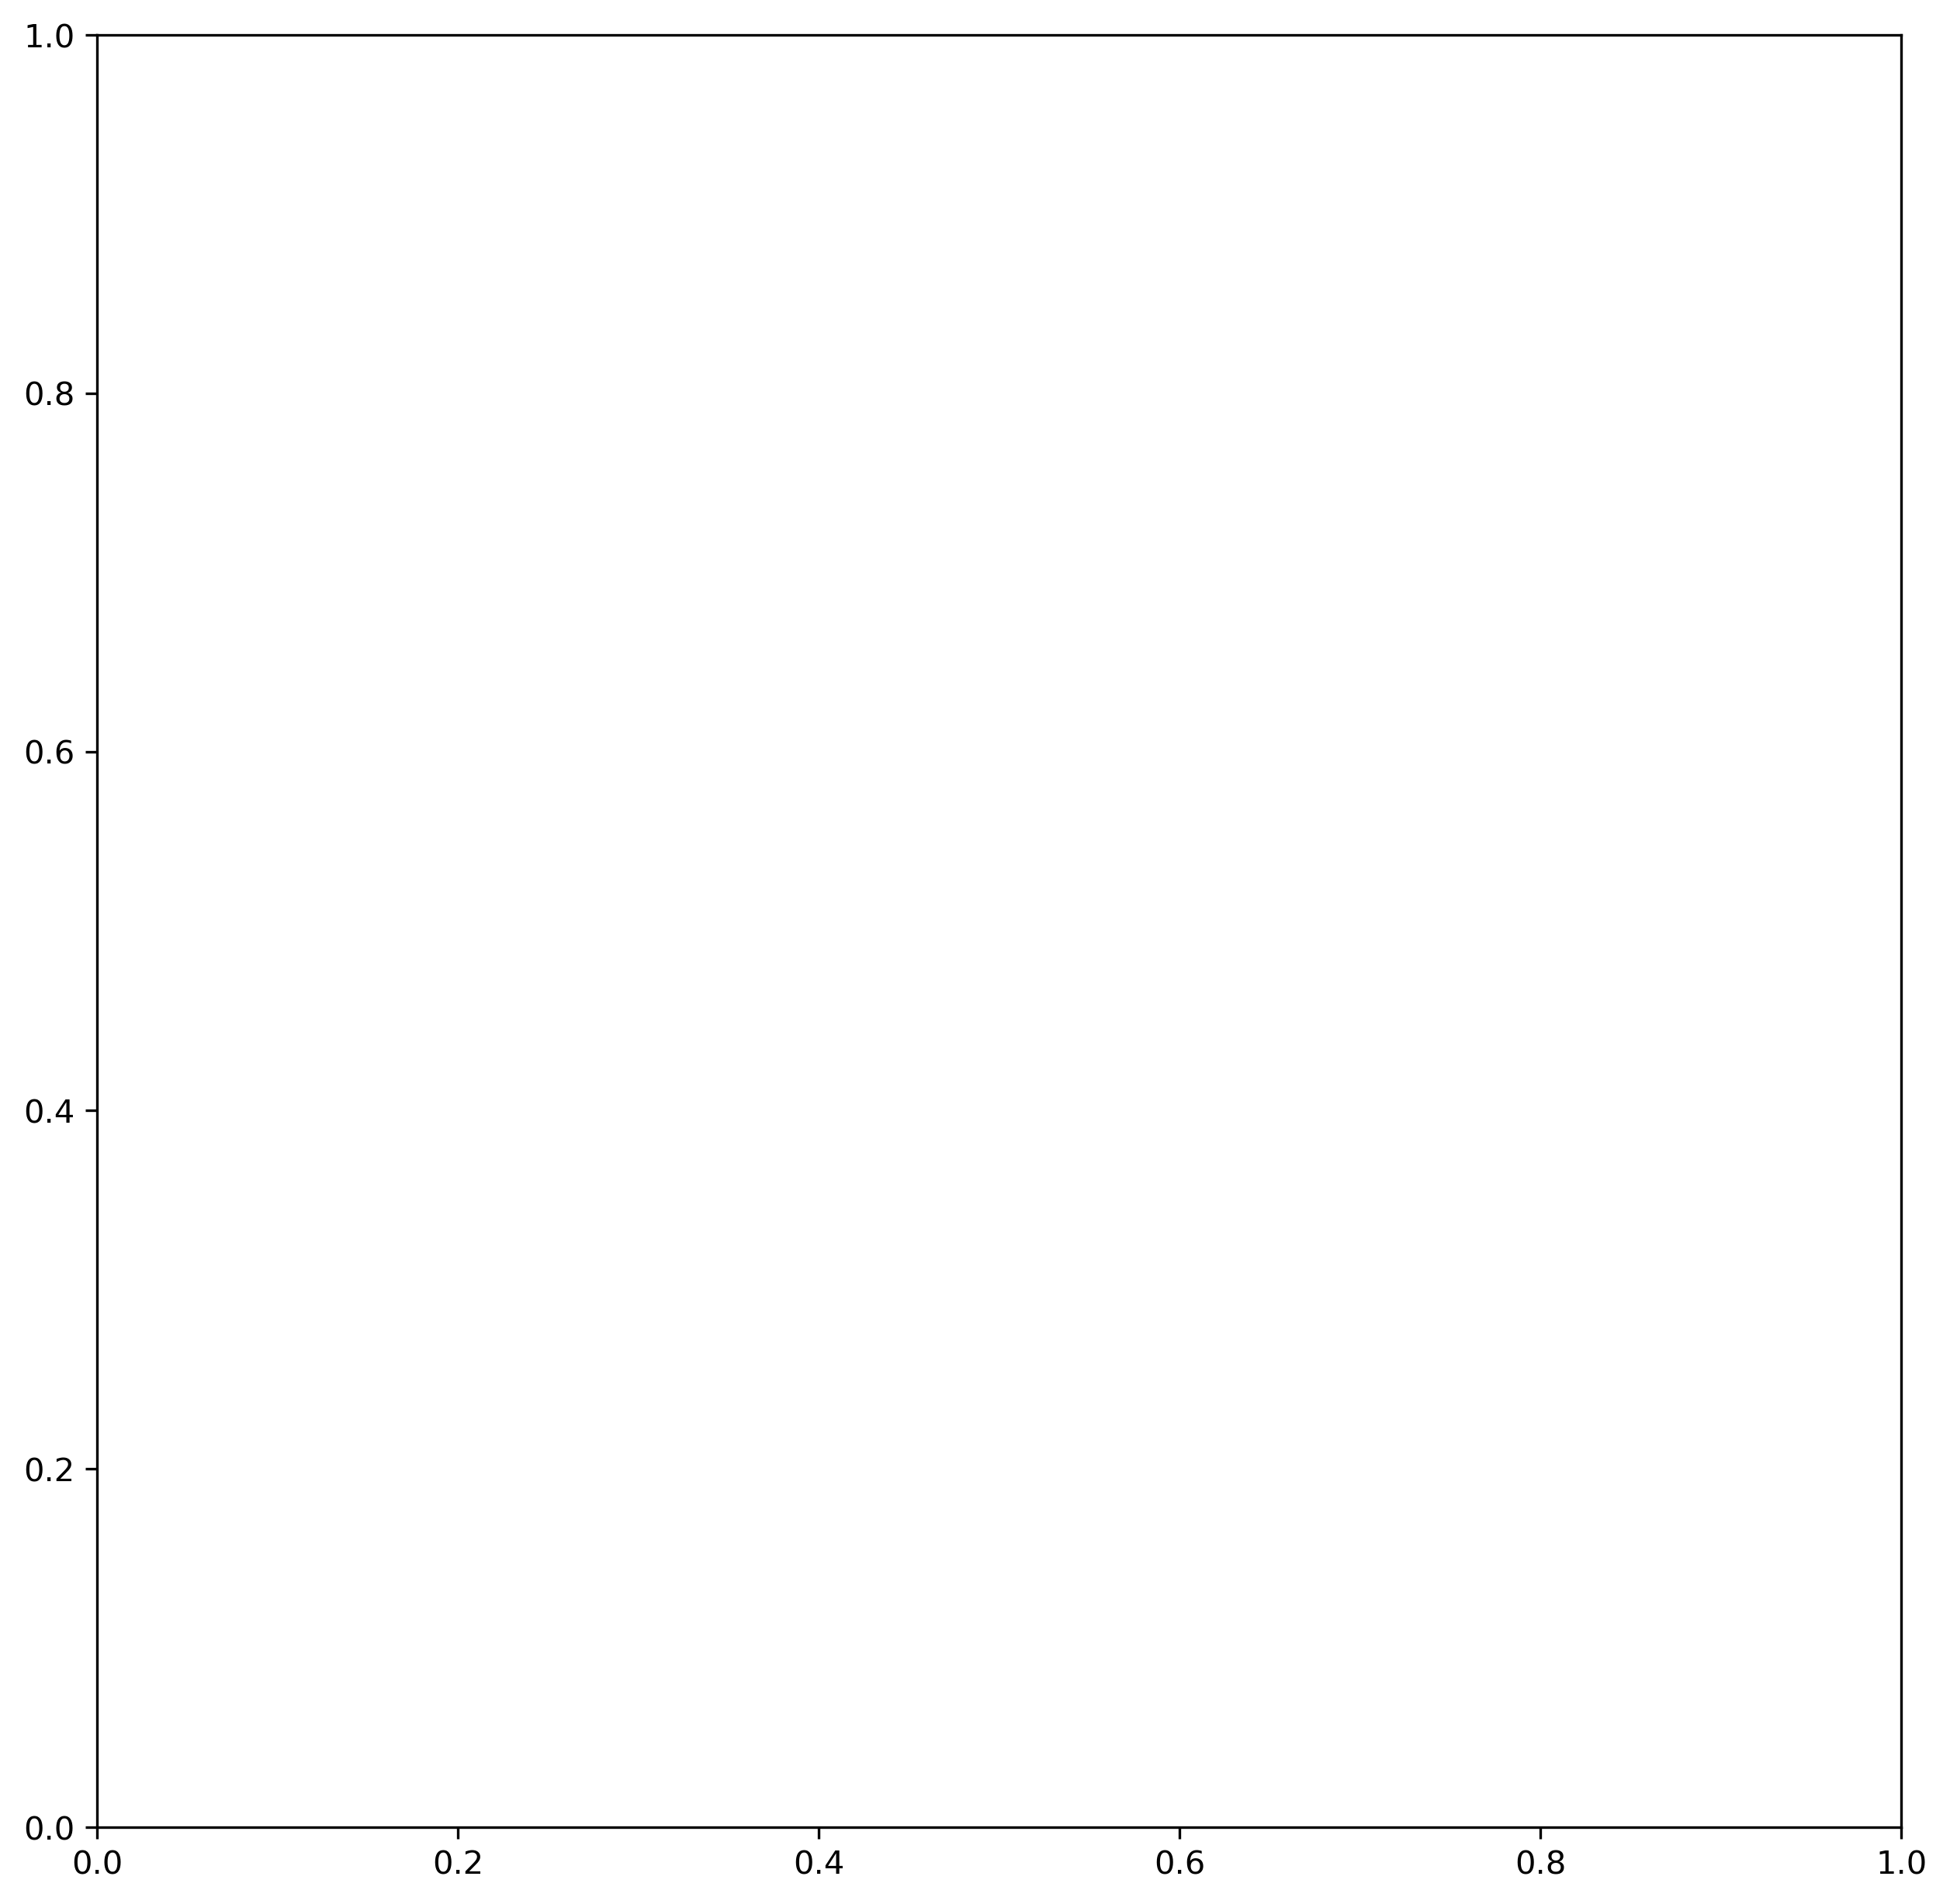

In [11]:
#df = pd.DataFrame(act_dic)
plt.figure(figsize=(10,10),dpi= 300)#设置画布的尺寸
fig, ax = plt.subplots(figsize=(10,10),dpi= 300)
ax.set_xticklabels(descriptors,  rotation=30,fontsize=10)
plt.title('active_compounds_properties_statistic',fontsize=20)#标题，并设定字号大小
labels = ('MolWt','NumHAcceptors','NumHDonors','MolLogP','NumRotatableBonds','TPSA')#图例
plt.boxplot([act_mw, act_nha, act_nhd, act_mlp,act_nrb,act_tpsa], labels = labels,
           patch_artist=True, # 要求用自定义颜色填充盒形图，默认白色填充
            showmeans=True, # 以点的形式显示均值
            widths=2,
 
            boxprops = {'color':'black','facecolor':'#FA8072'}, # 设置箱体属性，填充色和边框色
 
            flierprops = {'marker':'o','markerfacecolor':'red','color':'black'}, # 设置异常值属性，点的形状、填充色和边框色
 
            meanprops = {'marker':'D','markerfacecolor':'indianred'}, # 设置均值点的属性，点的形状、填充色
 
            medianprops = {'linestyle':'--','color':'orange'})


# ax.grid(linestyle="--", alpha=0.3)
# plt.tick_params(top='off', right='off')
plt.savefig('./results_imgs.png', bbox_inches='tight')
plt.show()

In [12]:
values=[act_mw, act_nha, act_nhd, act_mlp,act_nrb,act_tpsa]
keys=['MolWt', 'NumHAcceptors', 'NumHDonors', 'MolLogP', 'NumRotatableBonds','TPSA']
key_value_pairs = zip(keys, values)
my_dict = dict(key_value_pairs)
df=pd.DataFrame(my_dict)
df

,MolWt,NumHAcceptors,NumHDonors,MolLogP,NumRotatableBonds,TPSA
0,356.239,8,6,-0.31390,5,198.89
1,288.299,5,0,2.43820,2,65.74
2,234.339,2,1,3.01910,1,37.30
3,436.369,11,6,-0.45530,4,179.28
4,416.382,9,5,-0.34528,3,153.75
...,...,...,...,...,...,...
629,362.331,10,6,-3.59030,4,161.60
630,275.257,8,5,-2.75482,5,143.40
631,457.432,12,7,-3.10802,7,202.32
632,300.307,7,5,-1.24880,5,119.61


Figure-level interface for drawing categorical plots onto a FacetGrid.

This function provides access to several axes-level functions that show the relationship between a numerical and one or more categorical variables using one of several visual representations. The kind parameter selects the underlying axes-level function to use:
seaborn.catplot

<AxesSubplot:>

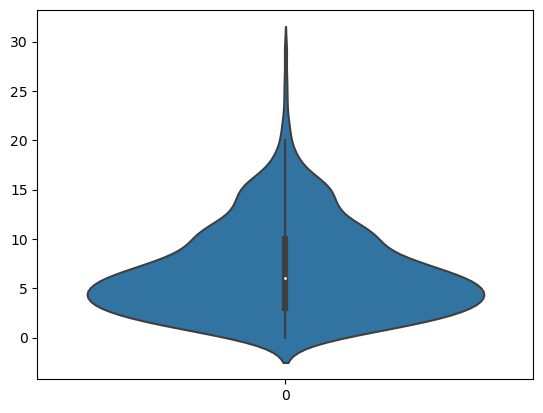

In [13]:
sns.violinplot(data=df['NumHAcceptors'])

<AxesSubplot:>

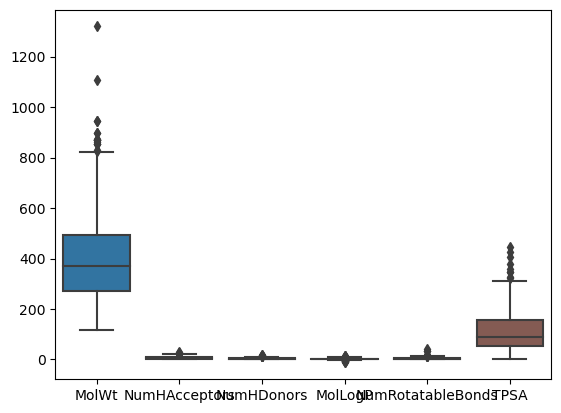

In [14]:
sns.boxplot(data=df,
            x=None, 
            y=None, 
            hue=None, 
            order=None, 
            hue_order=None, 
            orient=None, 
            color=None, 
            palette=None, 
            saturation=0.75, 
            width=0.8, 
            dodge=True, 
            fliersize=5, 
            linewidth=None, 
            whis=1.5, 
            ax=None)

<Figure size 1600x1000 with 0 Axes>

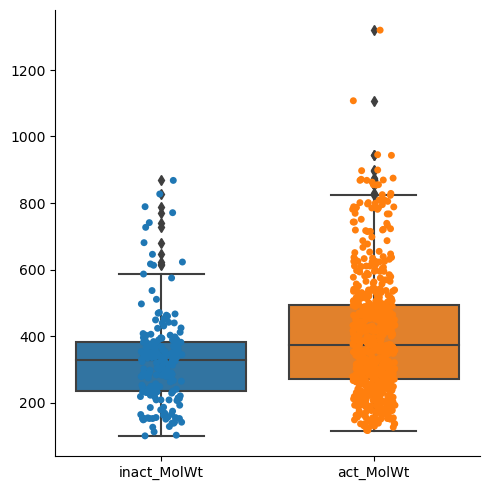

In [18]:
plt.figure(figsize=(8,5),dpi= 200)#设置画布的尺寸
#plt.title('MolWt',fontsize=18)#标题，并设定字号大小
labels = 'inact_MolWt', 'act_MolWt'
ax=sns.catplot(data=[inact_mw,act_mw])
ax=sns.boxplot(data=[inact_mw,act_mw])
ax.set_xticklabels(labels)
plt.savefig('./results_mw.png', bbox_inches='tight')

In [ ]:
https://seaborn.pydata.org/generated/seaborn.catplot.html

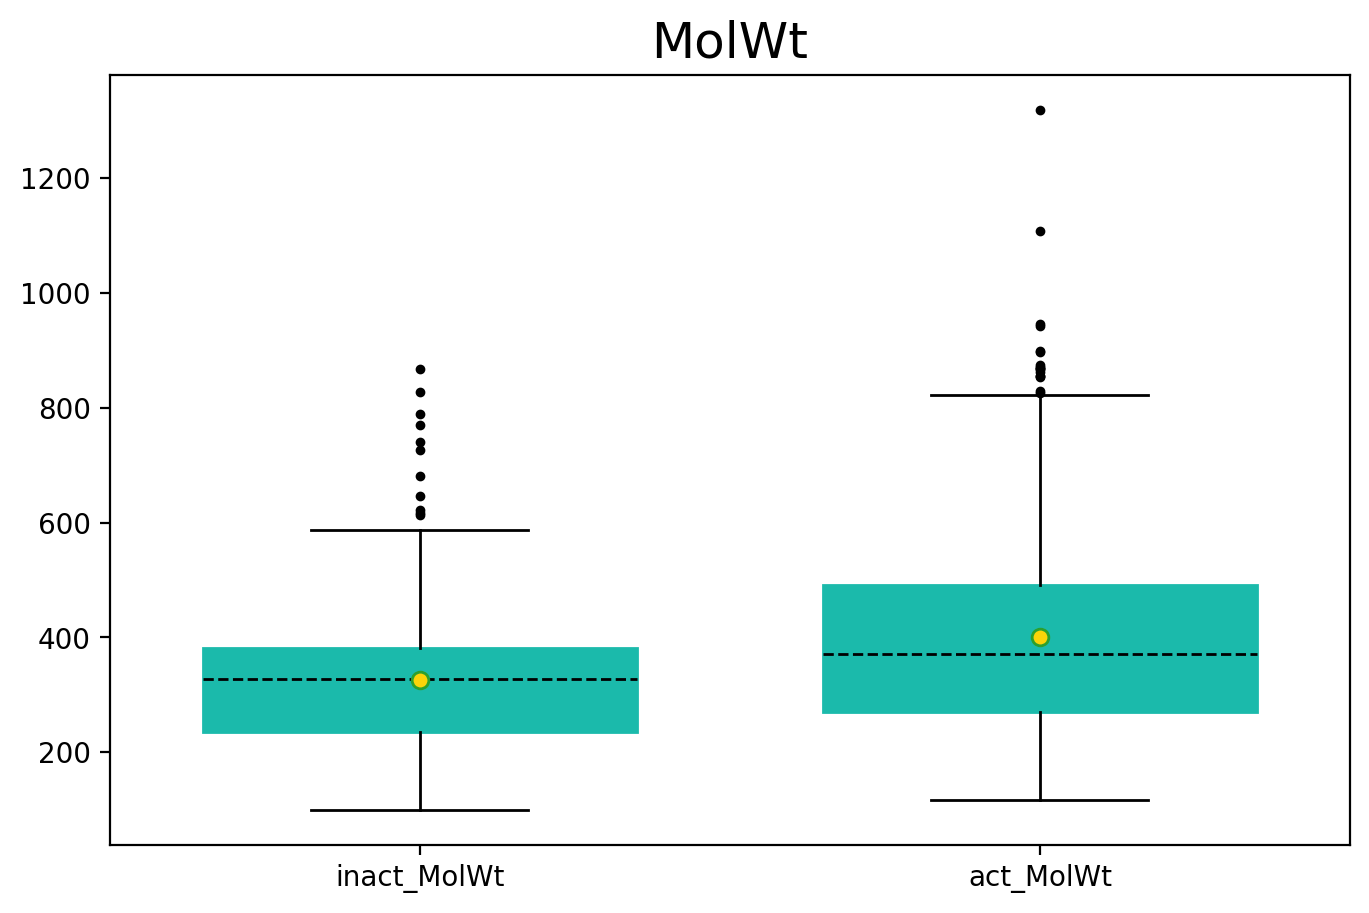

In [23]:
#act&inact
plt.figure(figsize=(8,5),dpi= 200)#设置画布的尺寸
plt.title('MolWt',fontsize=18)#标题，并设定字号大小
labels = 'inact_MolWt', 'act_MolWt'#图例
plt.boxplot([inact_mw,act_mw], labels = labels,widths = 0.7,
            patch_artist=True, # 要求用自定义颜色填充盒形图，默认白色填充
            showmeans=True, # 以点的形式显示均值
            boxprops = {'color':'#1bbaab','facecolor':'#1bbaab'}, # 设置箱体属性，填充色和边框色
            flierprops = {'marker':'.', 'markerfacecolor':'black', 'markersize':5,'linestyle':'none'}, # 设置异常值属性，点的形状、填充色和边框色
            meanprops = {'marker':'o','markerfacecolor':'#fad409','markersize':6}, # 设置均值点的属性，点的形状、填充色
            medianprops = {'linestyle':'--','color':'black'})

plt.savefig('./results_mw.png', bbox_inches='tight')
plt.show()

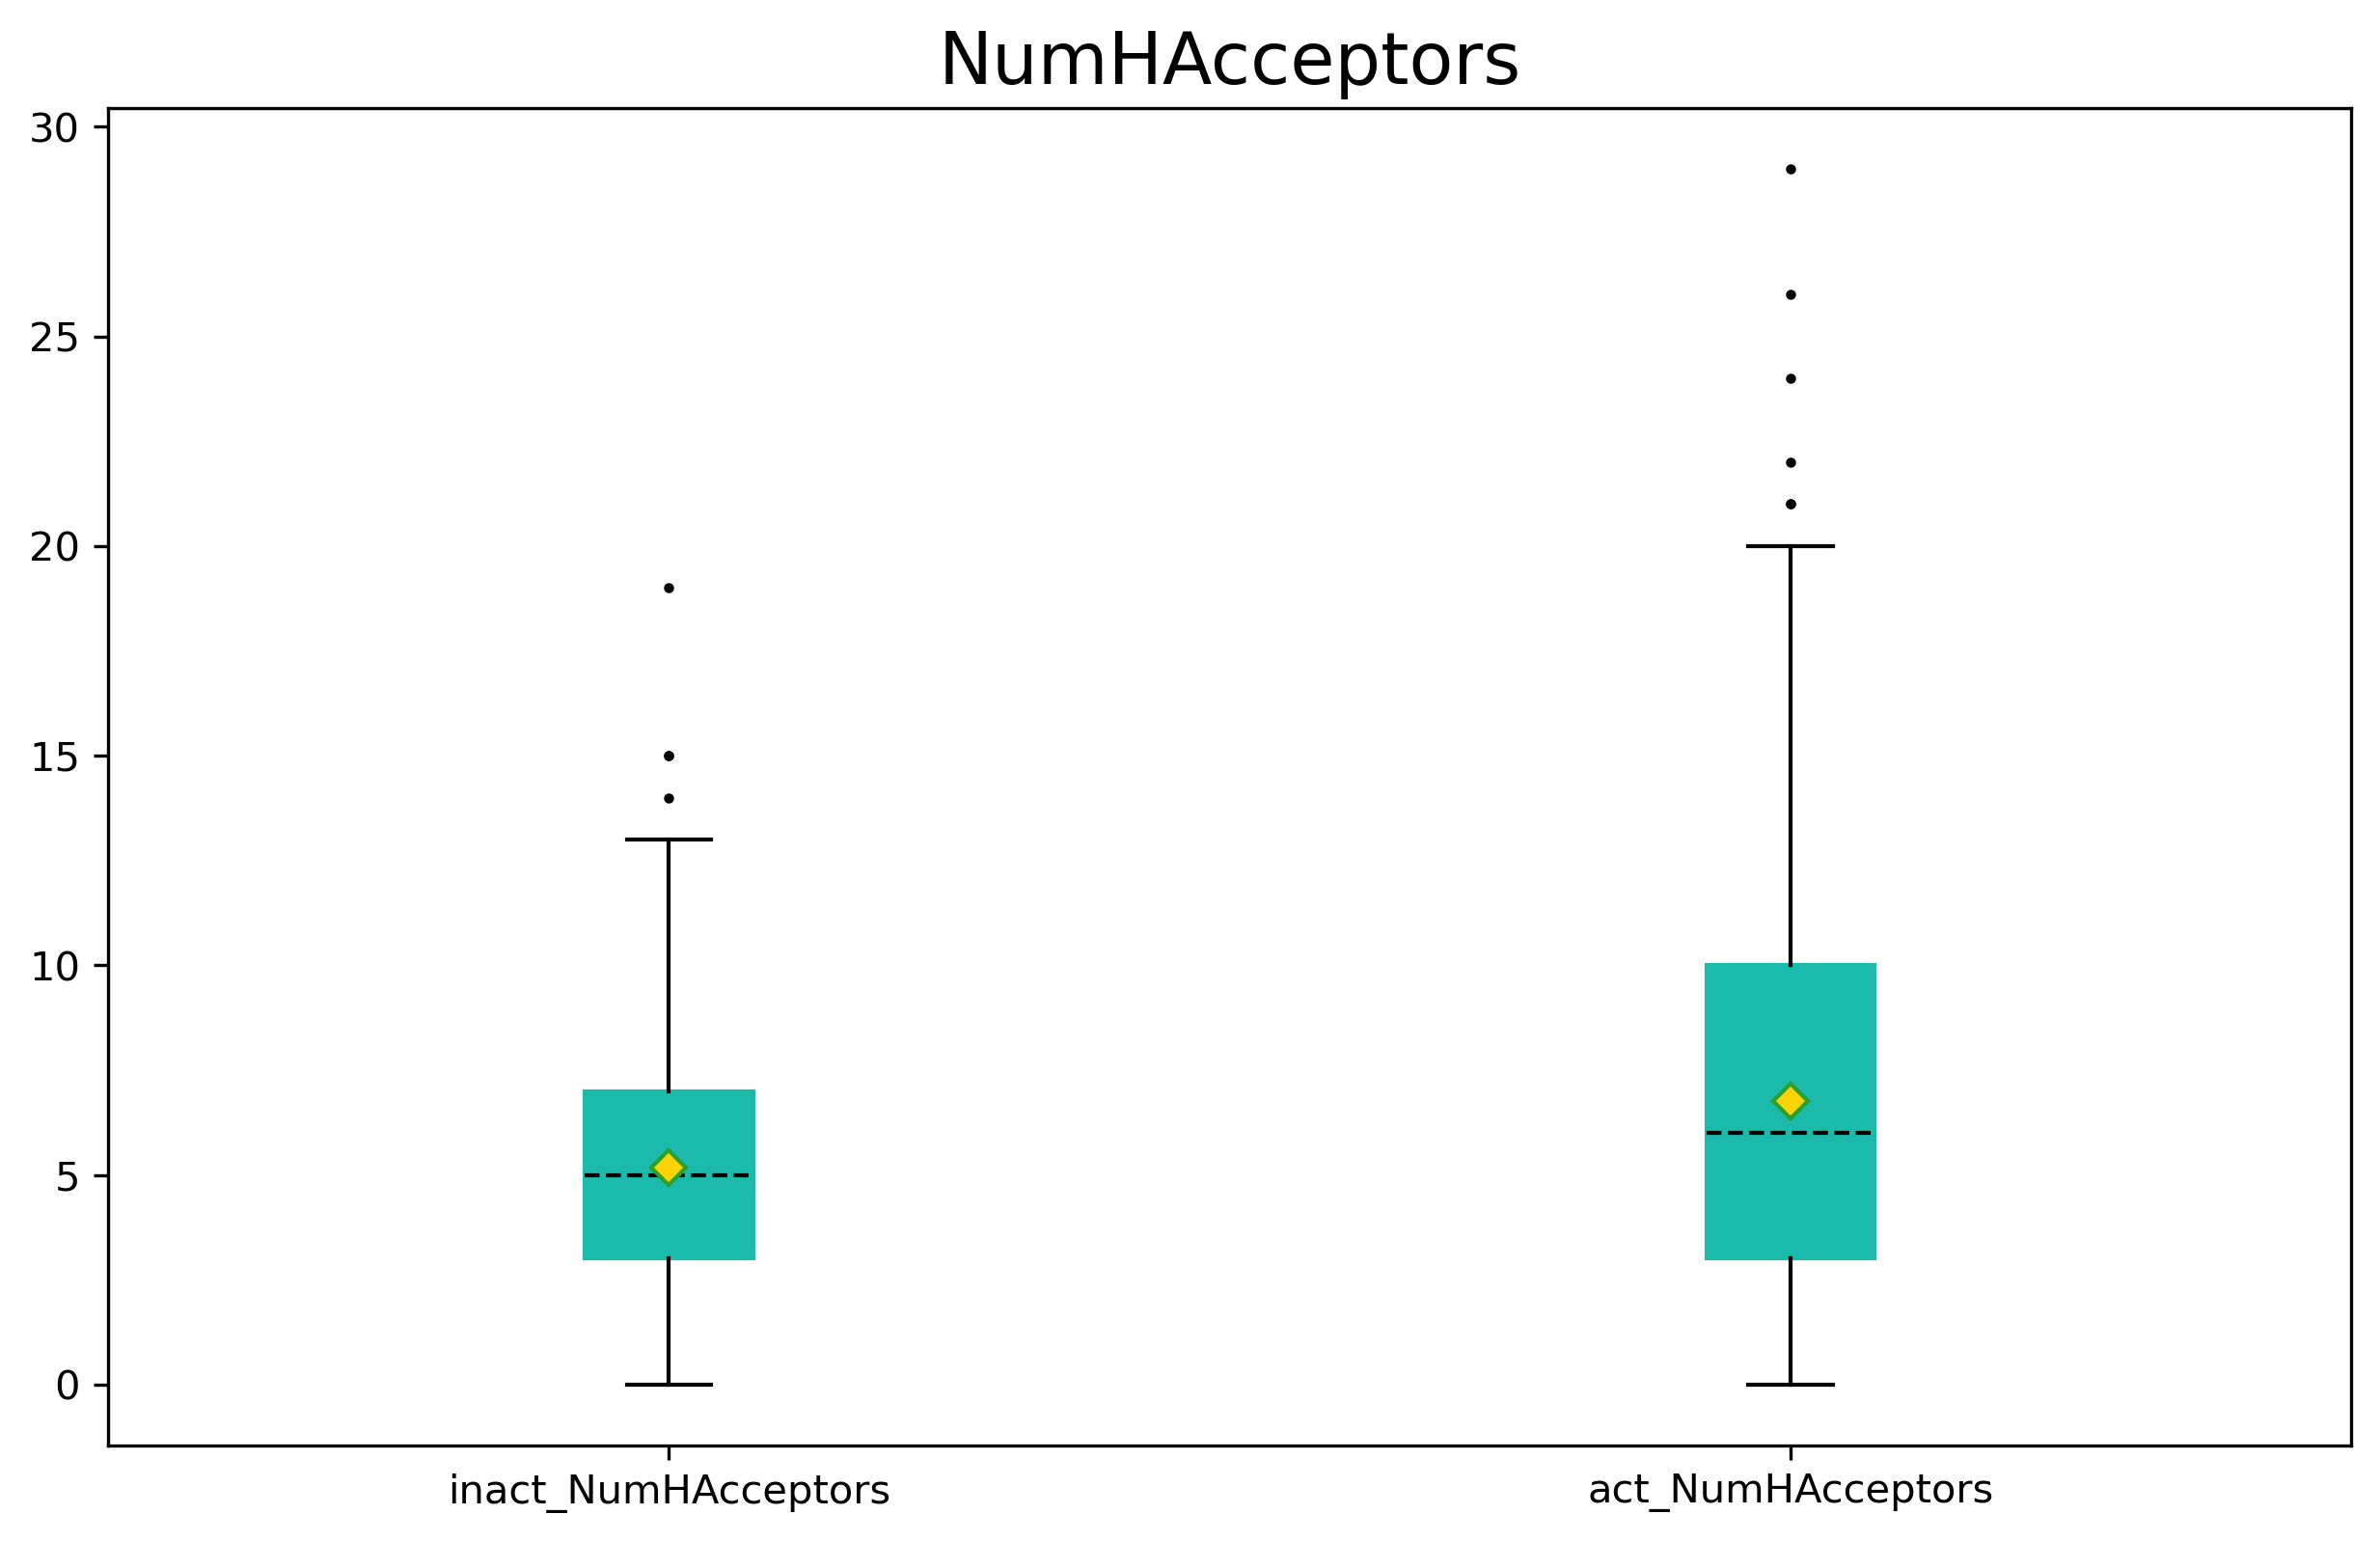

In [24]:
#act&inact
# plt.rcParams['font.sans-serif']=['Simhei'] #解决中文显示问题，目前只知道黑体可行
plt.rcParams['axes.unicode_minus']=False

plt.figure(figsize=(10,6),dpi= 300)#设置画布的尺寸
plt.title('NumHAcceptors',fontsize=18)#标题，并设定字号大小
labels = 'inact_NumHAcceptors', 'act_NumHAcceptors'#图例
plt.boxplot([inact_nha,act_nha], labels = labels,
           patch_artist=True, # 要求用自定义颜色填充盒形图，默认白色填充
            showmeans=True, # 以点的形式显示均值
            boxprops = {'color':'#1bbaab','facecolor':'#1bbaab'}, # 设置箱体属性，填充色和边框色
            flierprops = {'marker':'.', 'markerfacecolor':'black', 'markersize':3,'linestyle':'none'}, # 设置异常值属性，点的形状、填充色和边框色
            meanprops = {'marker':'D','markerfacecolor':'#fad409','markersize':6}, # 设置均值点的属性，点的形状、填充色
            medianprops = {'linestyle':'--','color':'black'})

plt.savefig('./results_NumHAcceptors.png', bbox_inches='tight')
plt.show()

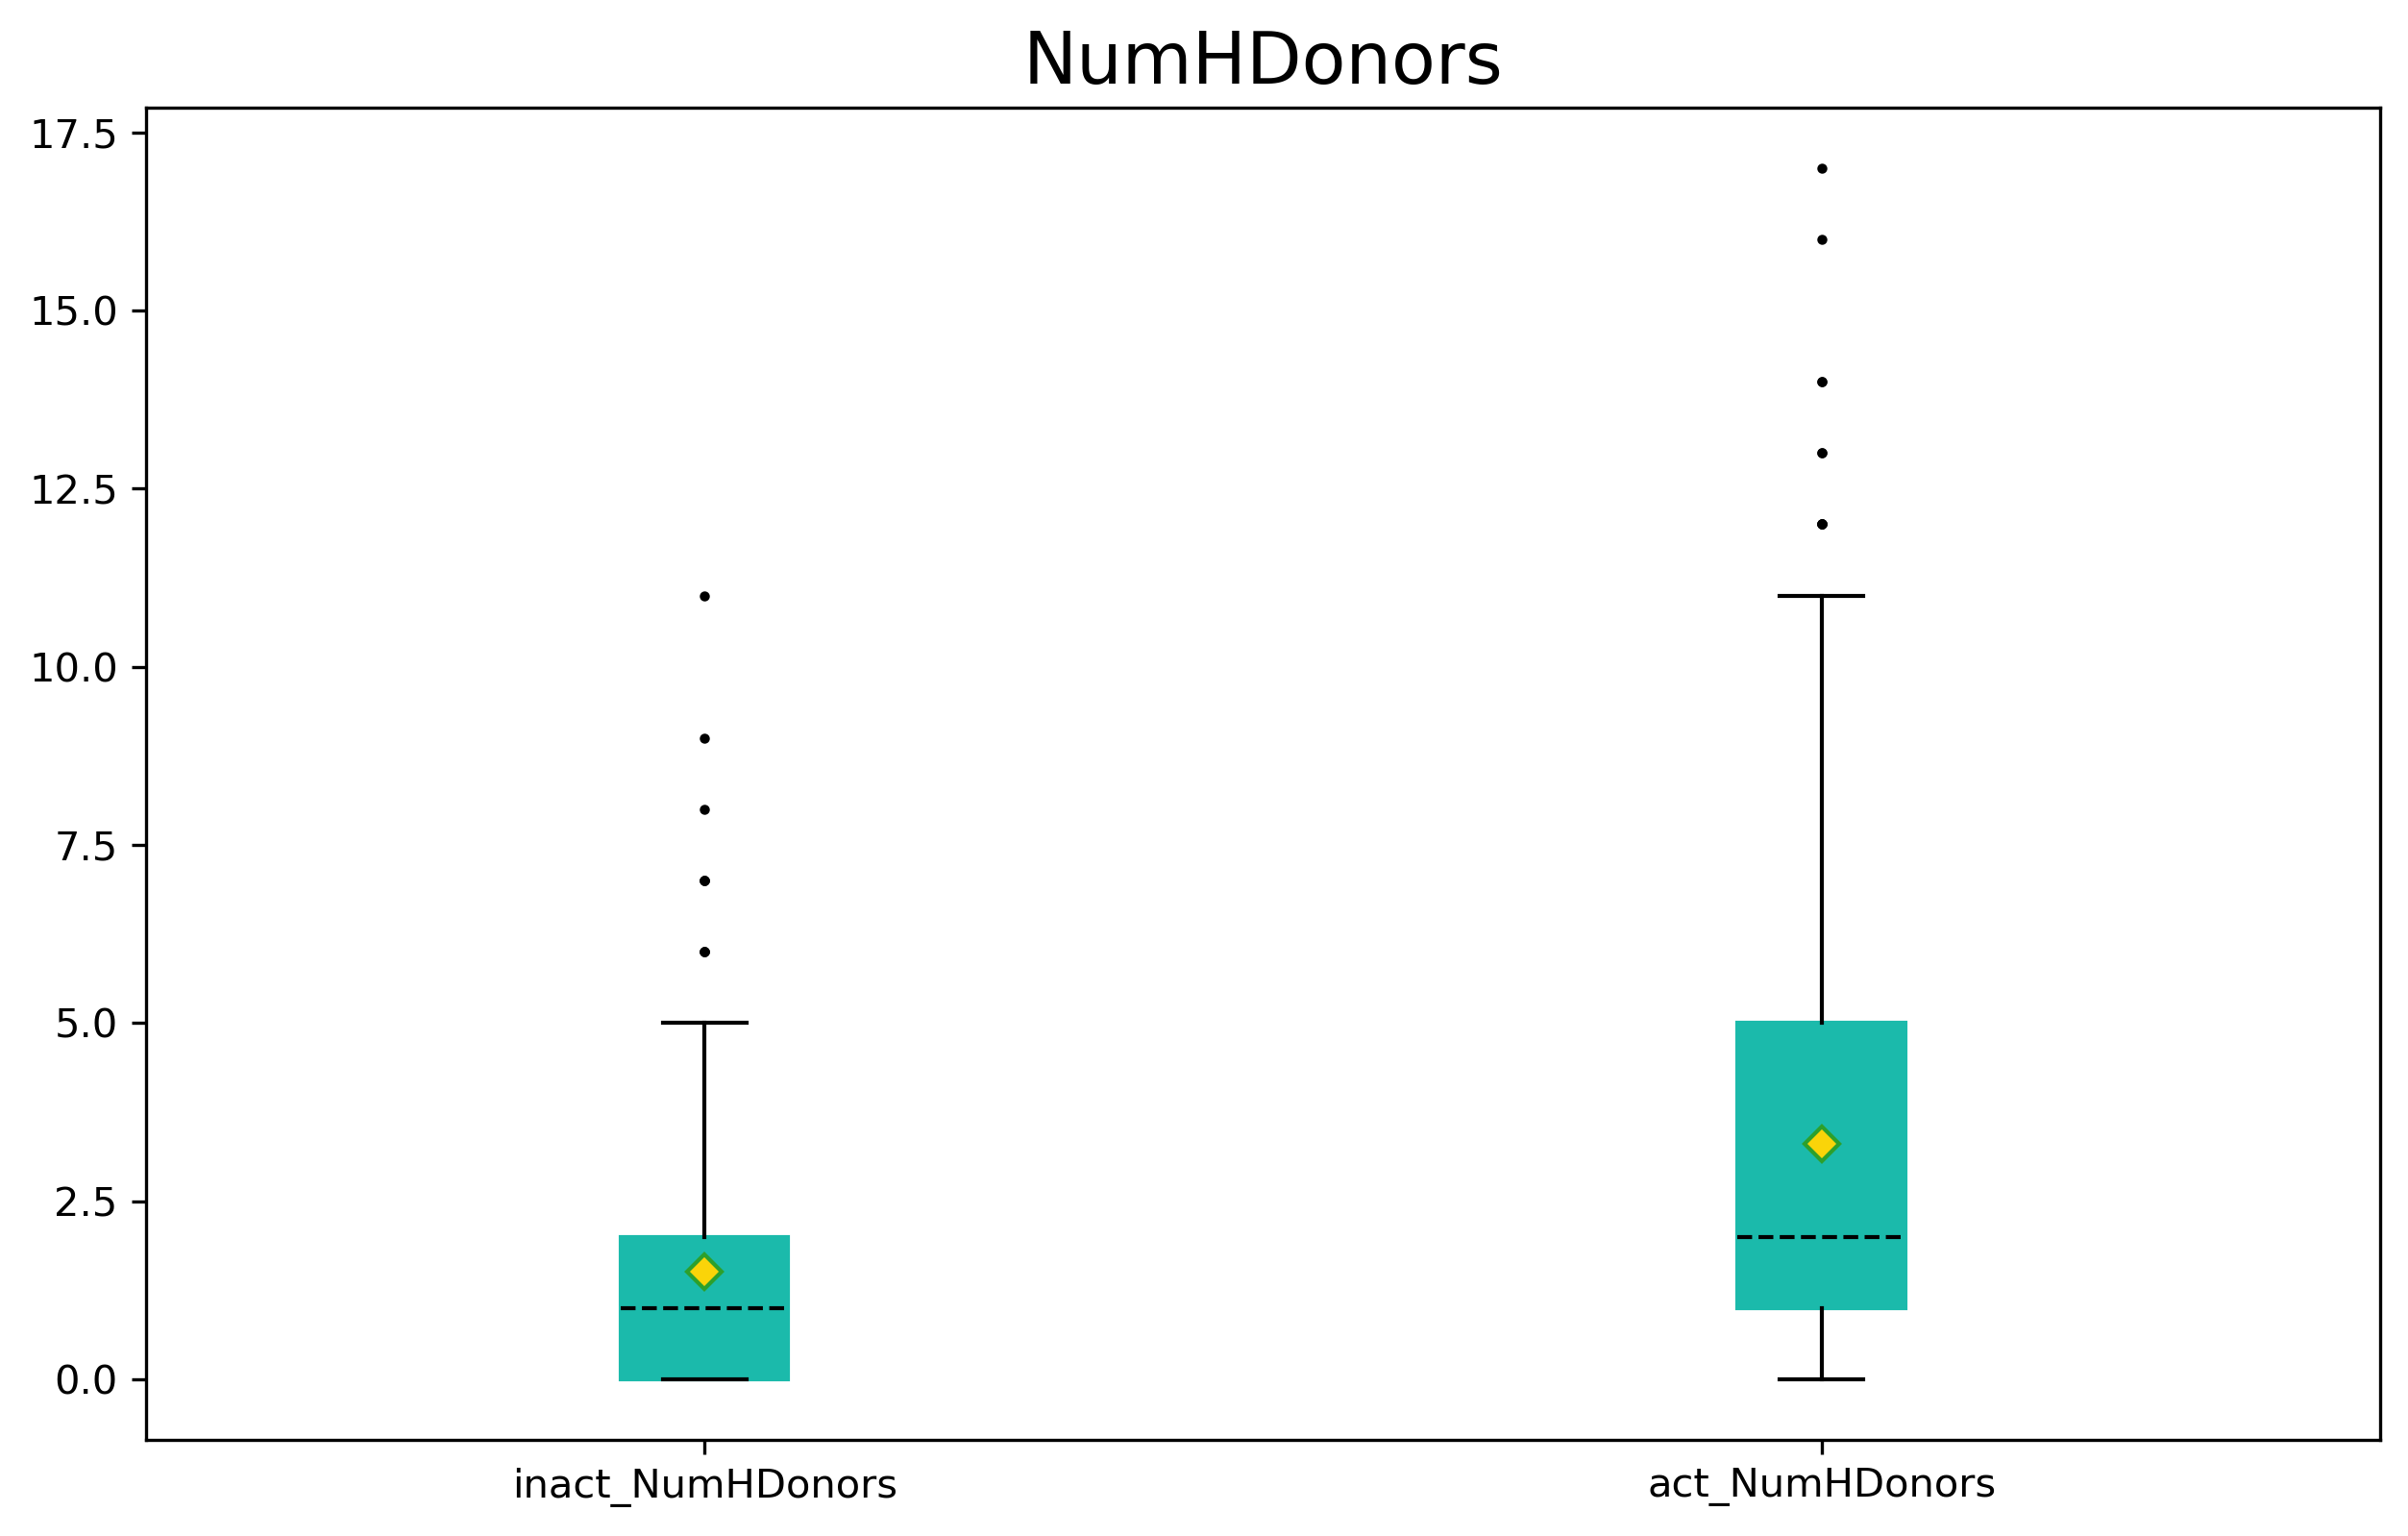

In [25]:
#act&inact
plt.figure(figsize=(10,6),dpi= 300)#设置画布的尺寸
plt.rcParams['axes.unicode_minus']=False

plt.title('NumHDonors',fontsize=18)#标题，并设定字号大小
labels = 'inact_NumHDonors', 'act_NumHDonors'#图例
# plt.ylim(-30,30)
# print([inact_nhd,act_nhd])
plt.boxplot([inact_nhd,act_nhd], labels = labels,
           patch_artist=True, # 要求用自定义颜色填充盒形图，默认白色填充
            showmeans=True, # 以点的形式显示均值
            boxprops = {'color':'#1bbaab','facecolor':'#1bbaab'}, # 设置箱体属性，填充色和边框色
            flierprops = {'marker':'.', 'markerfacecolor':'black', 'markersize':3,'linestyle':'none'}, # 设置异常值属性，点的形状、填充色和边框色
            meanprops = {'marker':'D','markerfacecolor':'#fad409','markersize':6}, # 设置均值点的属性，点的形状、填充色
            medianprops = {'linestyle':'--','color':'black'})

plt.savefig('./results_NumHDonors.png', bbox_inches='tight')
plt.show()

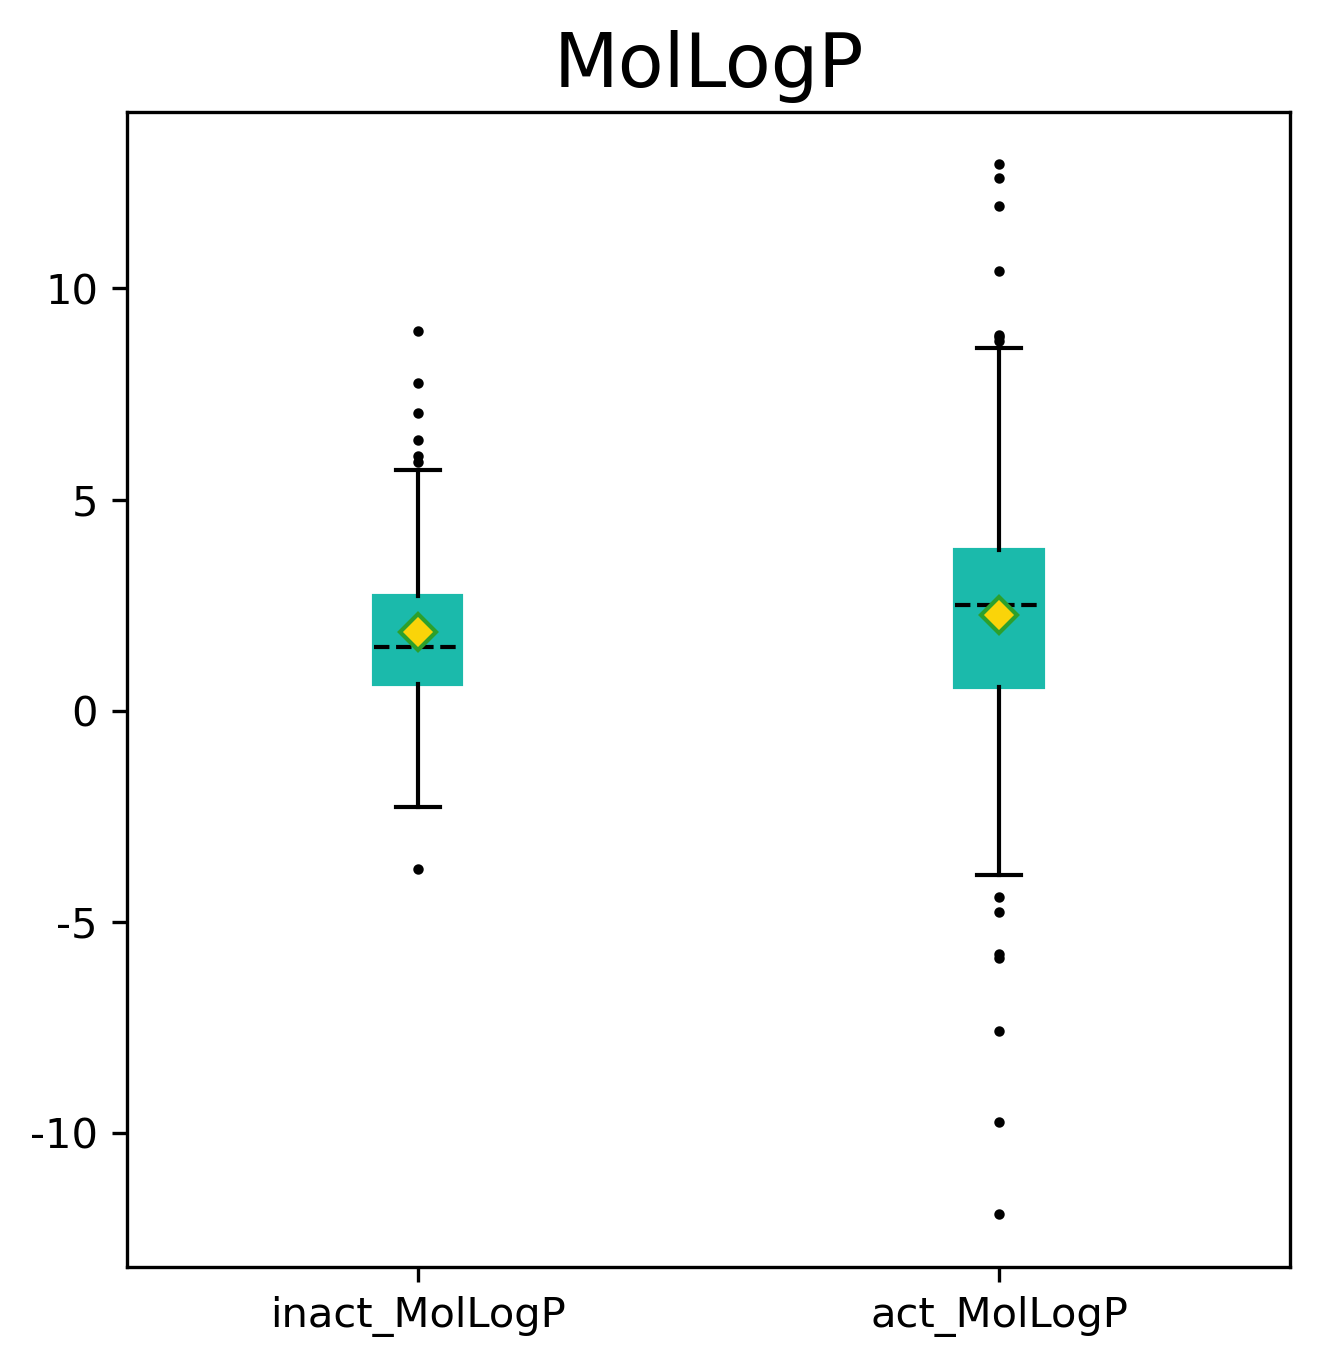

In [26]:
#act&inact
plt.figure(figsize=(5,5),dpi= 300)#设置画布的尺寸
plt.rcParams['axes.unicode_minus']=False

plt.title('MolLogP',fontsize=18)#标题，并设定字号大小
labels = 'inact_MolLogP', 'act_MolLogP'#图例
# plt.ylim(-30,30)
# print([inact_nhd,act_nhd])
plt.boxplot([inact_mlp,act_mlp], labels = labels,
           patch_artist=True, # 要求用自定义颜色填充盒形图，默认白色填充
            showmeans=True, # 以点的形式显示均值
            boxprops = {'color':'#1bbaab','facecolor':'#1bbaab'}, # 设置箱体属性，填充色和边框色
            flierprops = {'marker':'.', 'markerfacecolor':'black', 'markersize':3,'linestyle':'none'}, # 设置异常值属性，点的形状、填充色和边框色
            meanprops = {'marker':'D','markerfacecolor':'#fad409','markersize':6}, # 设置均值点的属性，点的形状、填充色
            medianprops = {'linestyle':'--','color':'black'})

plt.savefig('./results_MolLogP.png', bbox_inches='tight')
plt.show()

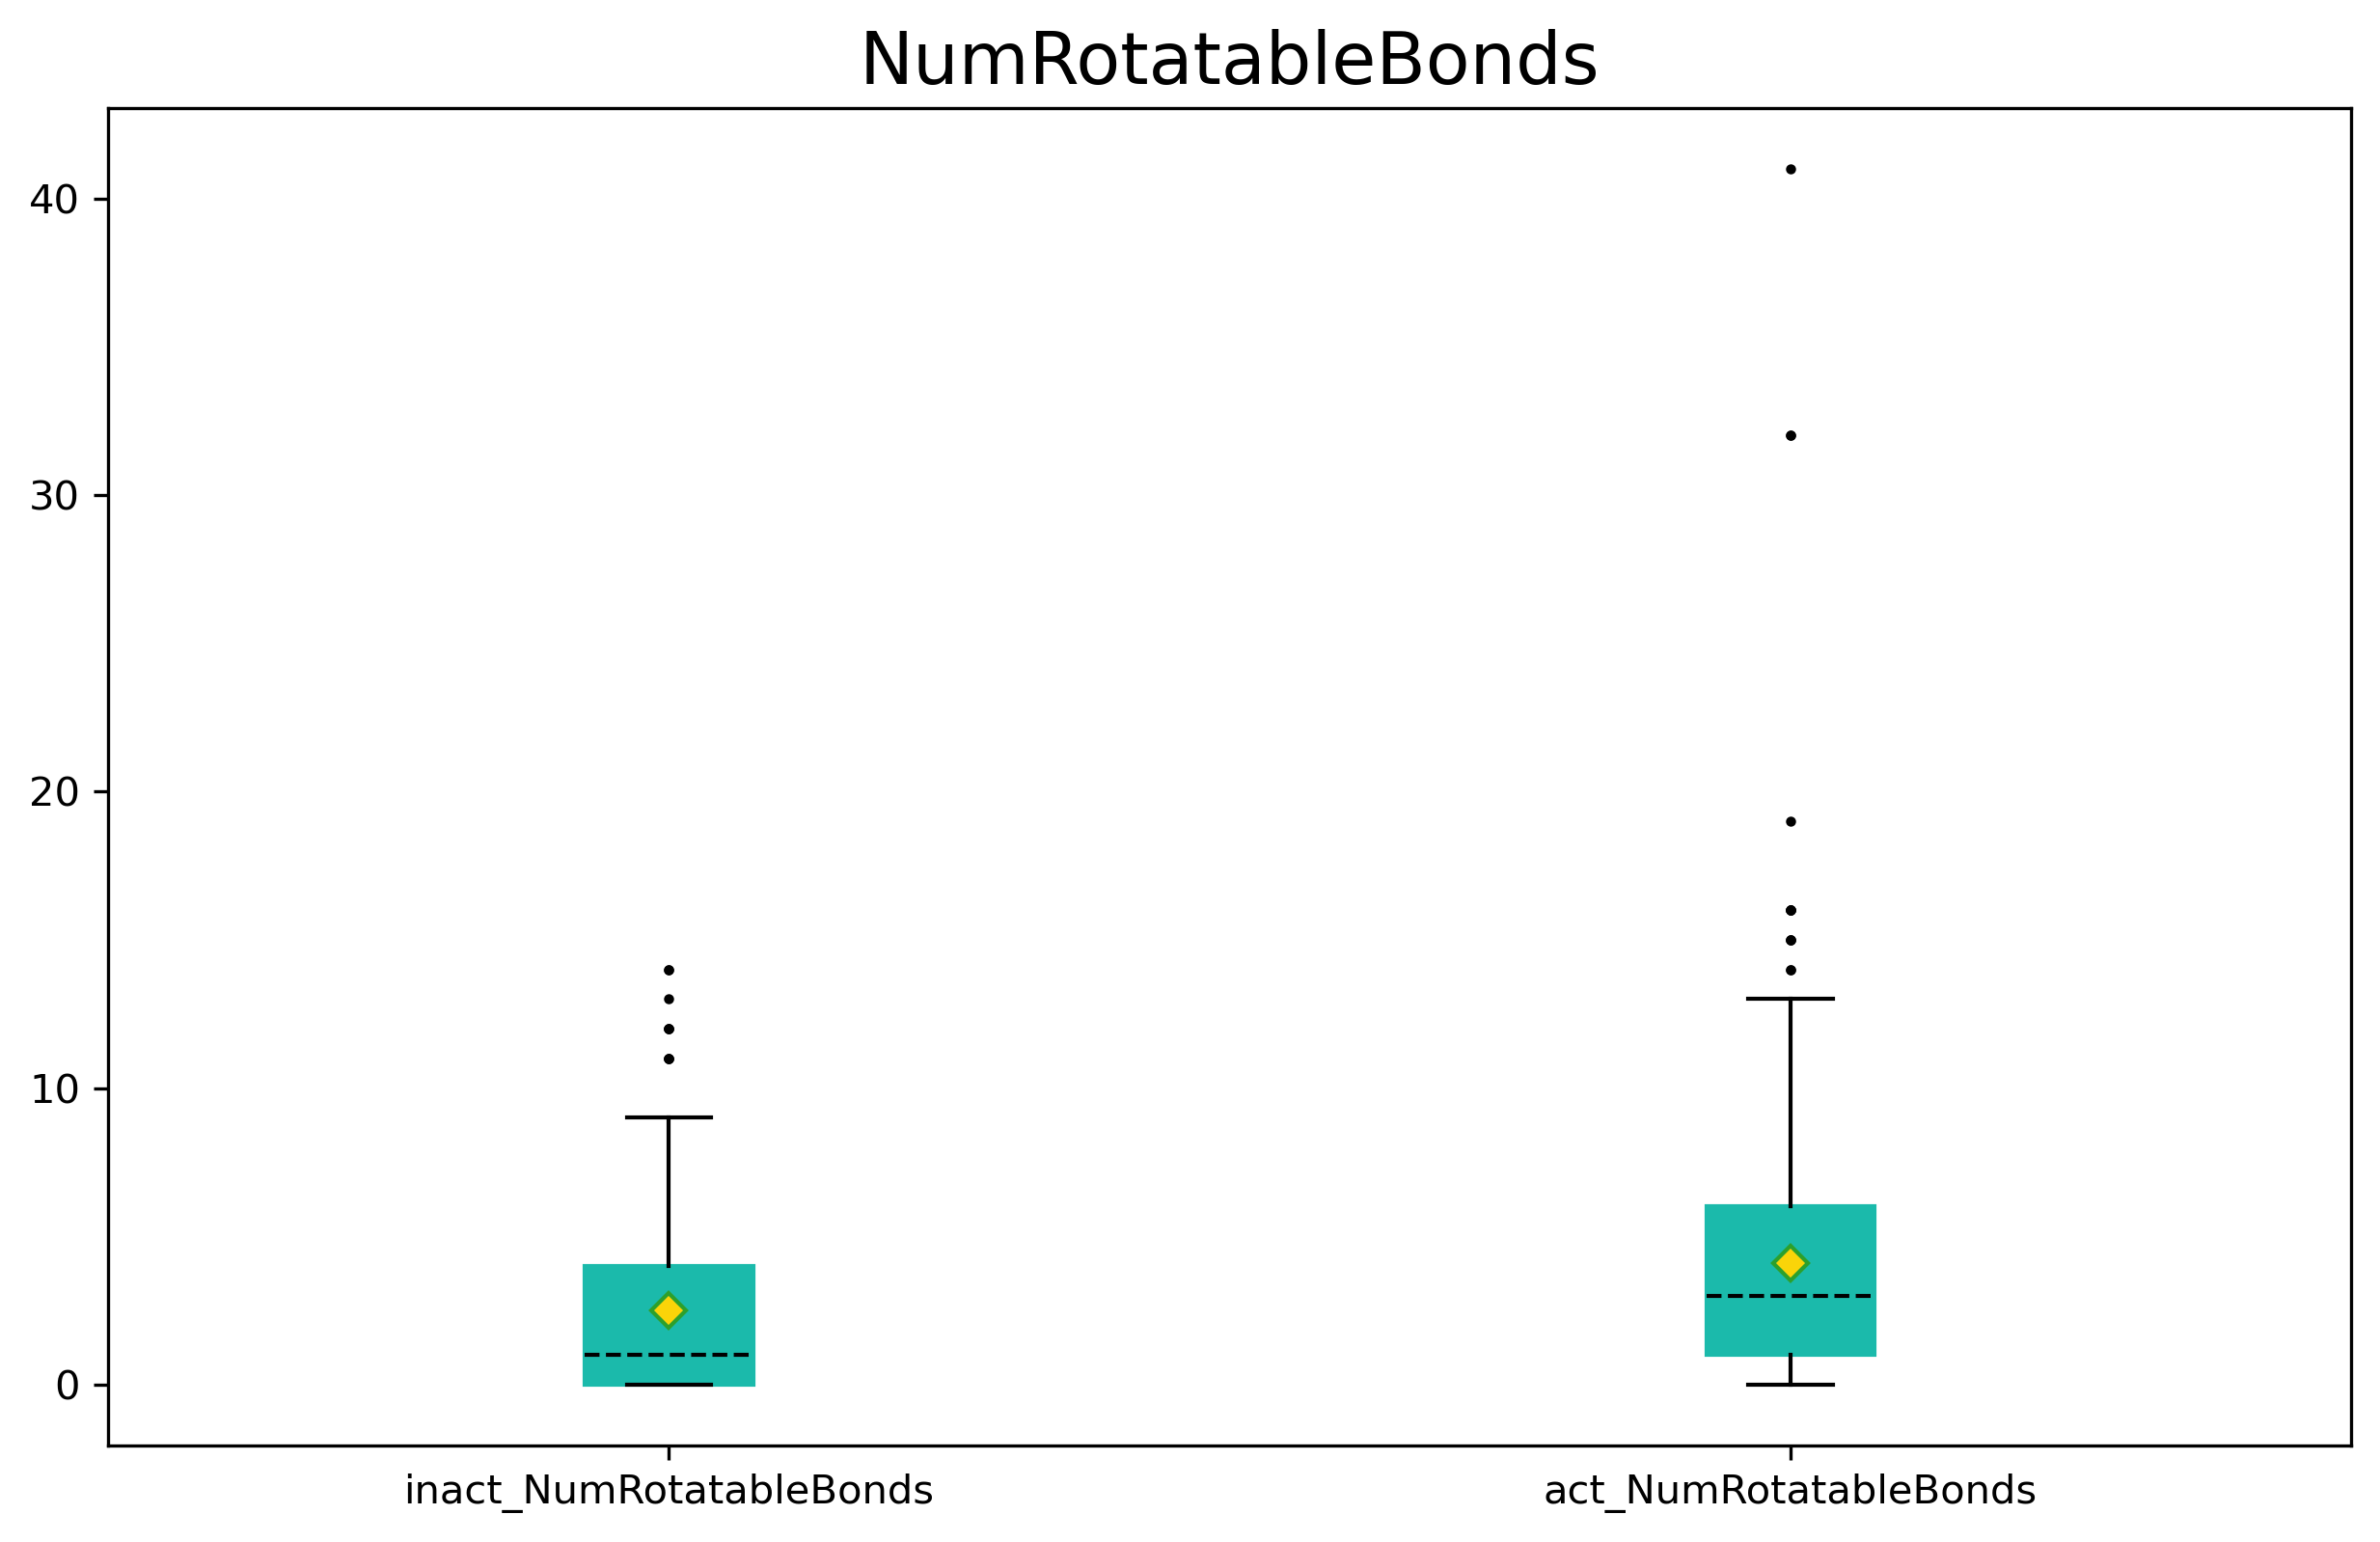

In [27]:
#act&inact
plt.figure(figsize=(10,6),dpi= 300)#设置画布的尺寸
plt.rcParams['axes.unicode_minus']=False

plt.title('NumRotatableBonds',fontsize=18)#标题，并设定字号大小
labels = 'inact_NumRotatableBonds', 'act_NumRotatableBonds'#图例
# plt.ylim(-30,30)
# print([inact_nhd,act_nhd])
plt.boxplot([inact_nrb,act_nrb], labels = labels,
           patch_artist=True, # 要求用自定义颜色填充盒形图，默认白色填充
            showmeans=True, # 以点的形式显示均值
            boxprops = {'color':'#1bbaab','facecolor':'#1bbaab'}, # 设置箱体属性，填充色和边框色
            flierprops = {'marker':'.', 'markerfacecolor':'black', 'markersize':3,'linestyle':'none'}, # 设置异常值属性，点的形状、填充色和边框色
            meanprops = {'marker':'D','markerfacecolor':'#fad409','markersize':6}, # 设置均值点的属性，点的形状、填充色
            medianprops = {'linestyle':'--','color':'black'})

plt.savefig('./results_NumRotatableBonds.png', bbox_inches='tight')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


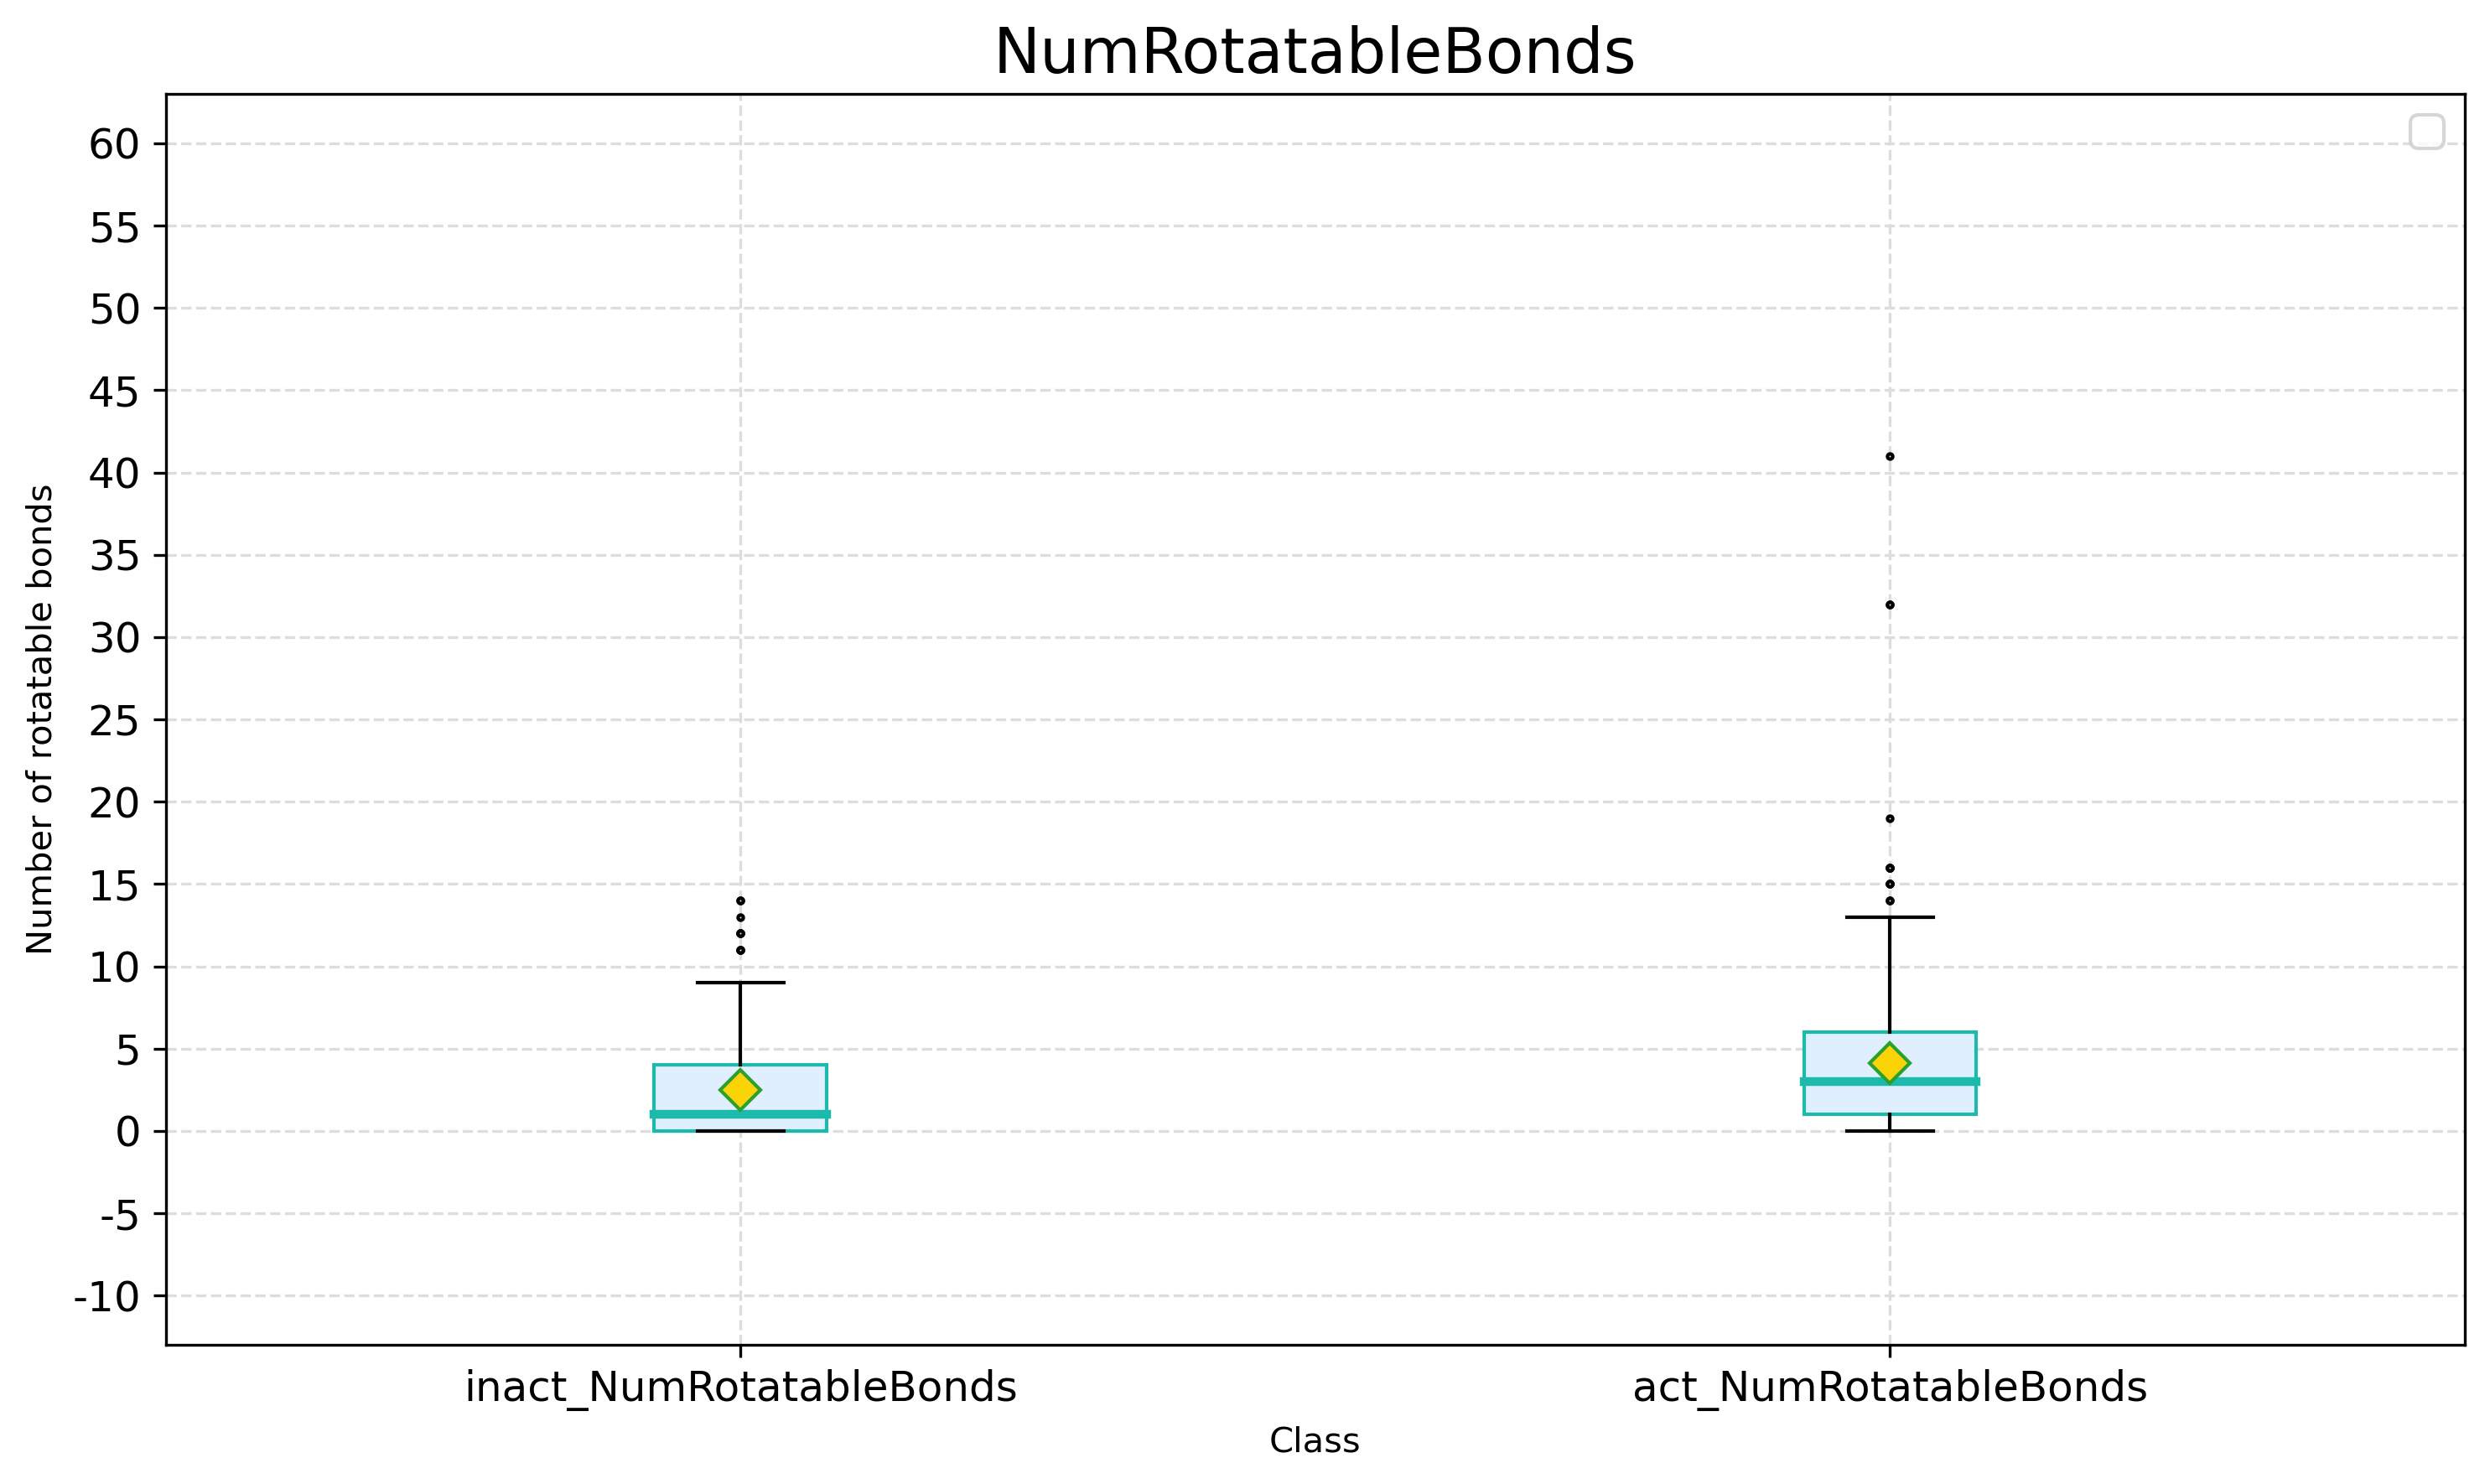

In [28]:
plt.figure(figsize=(10,6),dpi= 300)#设置画布的尺寸
plt.rcParams['axes.unicode_minus']=False

plt.title('NumRotatableBonds',fontsize=18)#标题，并设定字号大小
labels = 'inact_NumRotatableBonds', 'act_NumRotatableBonds'#图例
box_props = {'color': '#1bbaab', 'facecolor': '#dfeffd'}

# 均值点颜色和大小
mean_props = {'marker': 'D', 'markerfacecolor': '#fad409', 'markersize': 8}

# 异常值颜色和大小
flier_props = {'marker': '.', 'markerfacecolor': '#dfeffd', 'markersize': 3}

# 中位数线颜色
median_props = {'linewidth': 2.5, 'color': '#1bbaab'}

# 绘制箱型图
plt.boxplot([inact_nrb, act_nrb], 
            labels=labels,
            patch_artist=True, 
            boxprops=box_props,
            showmeans=True, 
            meanprops=mean_props,
            flierprops=flier_props, 
            medianprops=median_props)

# 设置坐标轴标签
plt.xlabel('Class')
plt.ylabel('Number of rotatable bonds')

# 修改x轴刻度字号
plt.xticks(fontsize=12)

# 修改y轴刻度和范围
plt.yticks(range(-10, 66, 5), fontsize=12)
plt.ylim([-13, 63])

# 添加网格线
plt.grid(True, linestyle='--', color='#ddd')

# 显示图例
plt.legend(fontsize=12)

# 调整图形边界
plt.tight_layout()

# 保存图形
plt.savefig('./results_NumRotatableBonds.png', dpi=300)

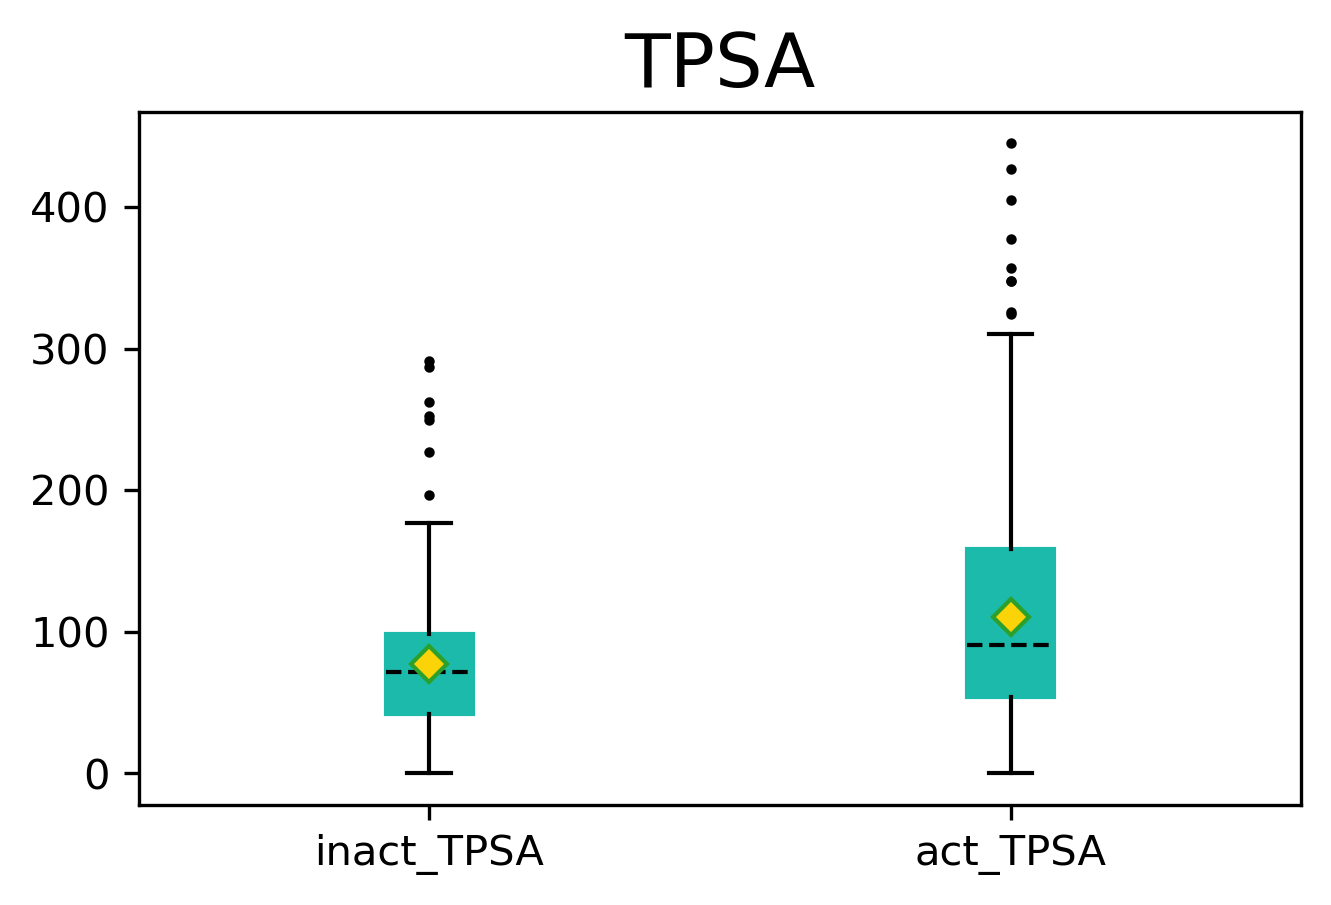

In [29]:
#act&inact
plt.figure(figsize=(5,3),dpi= 300)#设置画布的尺寸
plt.rcParams['axes.unicode_minus']=False

plt.title('TPSA',fontsize=18)#标题，并设定字号大小
labels = 'inact_TPSA', 'act_TPSA'#图例
# plt.ylim(-30,30)
# print([inact_nhd,act_nhd])
plt.boxplot([inact_tpsa,act_tpsa], labels = labels,
           patch_artist=True, # 要求用自定义颜色填充盒形图，默认白色填充
            showmeans=True, # 以点的形式显示均值
            boxprops = {'color':'#1bbaab','facecolor':'#1bbaab'}, # 设置箱体属性，填充色和边框色
            flierprops = {'marker':'.', 'markerfacecolor':'black', 'markersize':3,'linestyle':'none'}, # 设置异常值属性，点的形状、填充色和边框色
            meanprops = {'marker':'D','markerfacecolor':'#fad409','markersize':6}, # 设置均值点的属性，点的形状、填充色
            medianprops = {'linestyle':'--','color':'black'})

plt.savefig('./results_TPSA.png', bbox_inches='tight')
plt.show()

C:\Users\luming\anaconda3\envs\dgl\lib\site-packages\rdkit\Chem\Draw\SimilarityMaps.py:212: UserWarning: The following kwargs were not used by contour: 'dpi'
  x, y, z, contourLines, colors=colors, alpha=alpha, **kwargs)


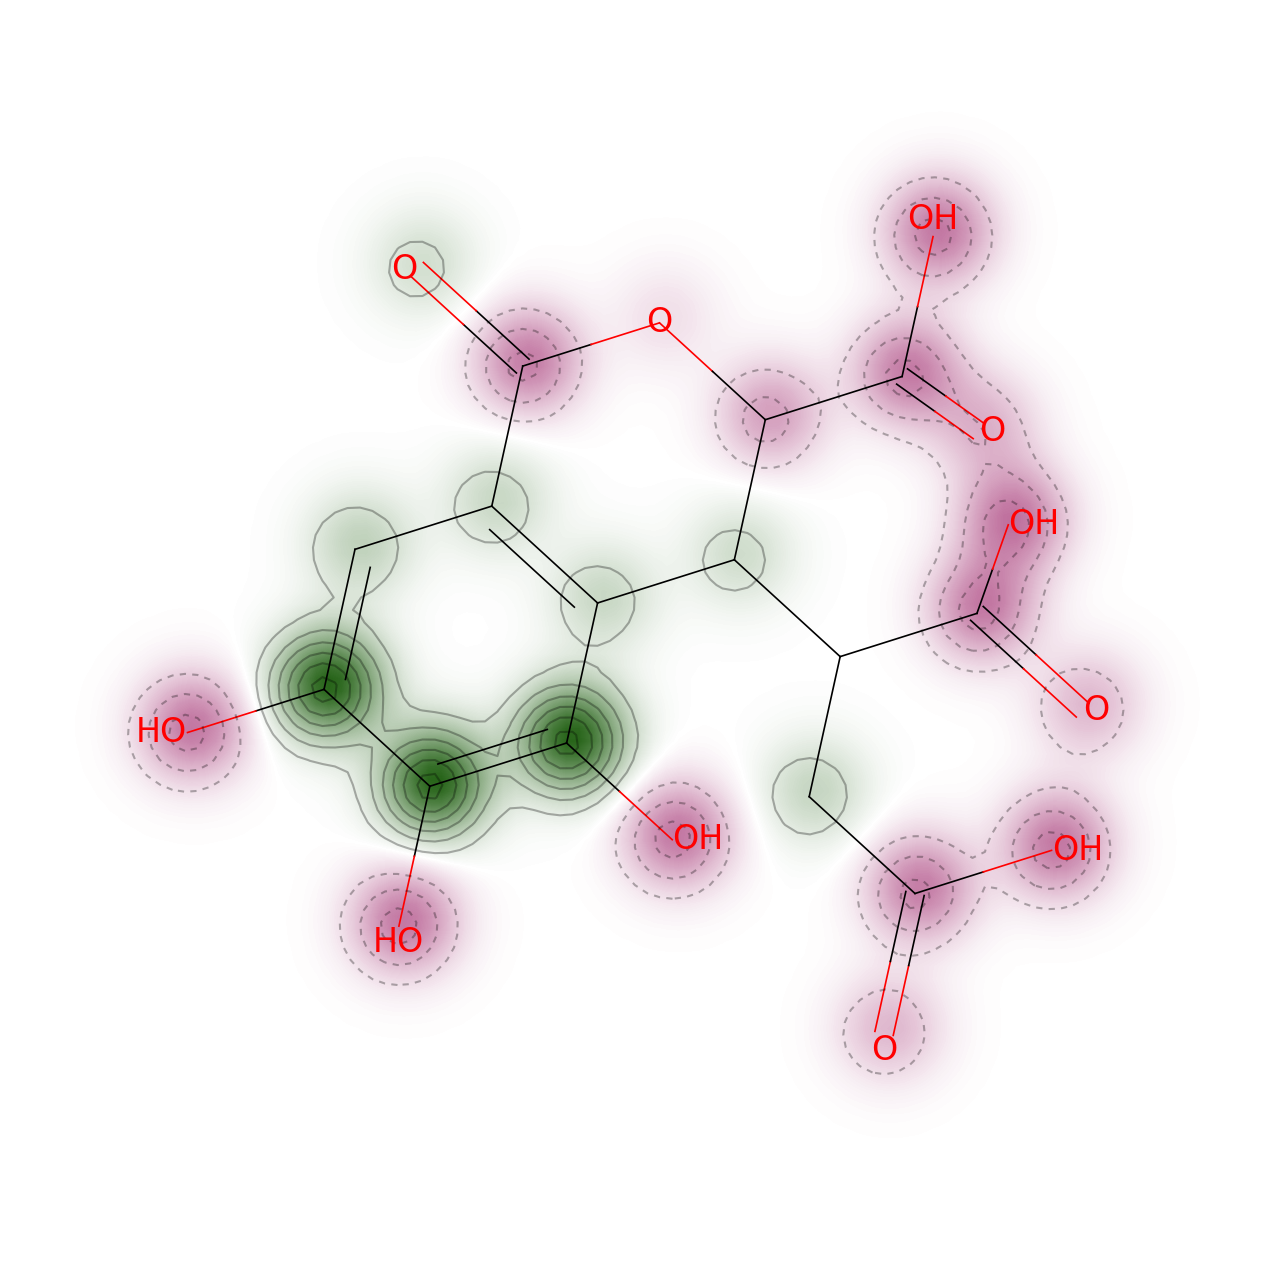

In [30]:
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import SimilarityMaps
for mol in act_mol[:1]:
    contribs = rdMolDescriptors._CalcCrippenContribs(mol)
    fig = SimilarityMaps.GetSimilarityMapFromWeights(mol, [x for x,y in contribs],contourLines=10,
                                                          alpha=0.3,
                                                          size=(500,500),dpi = 500)

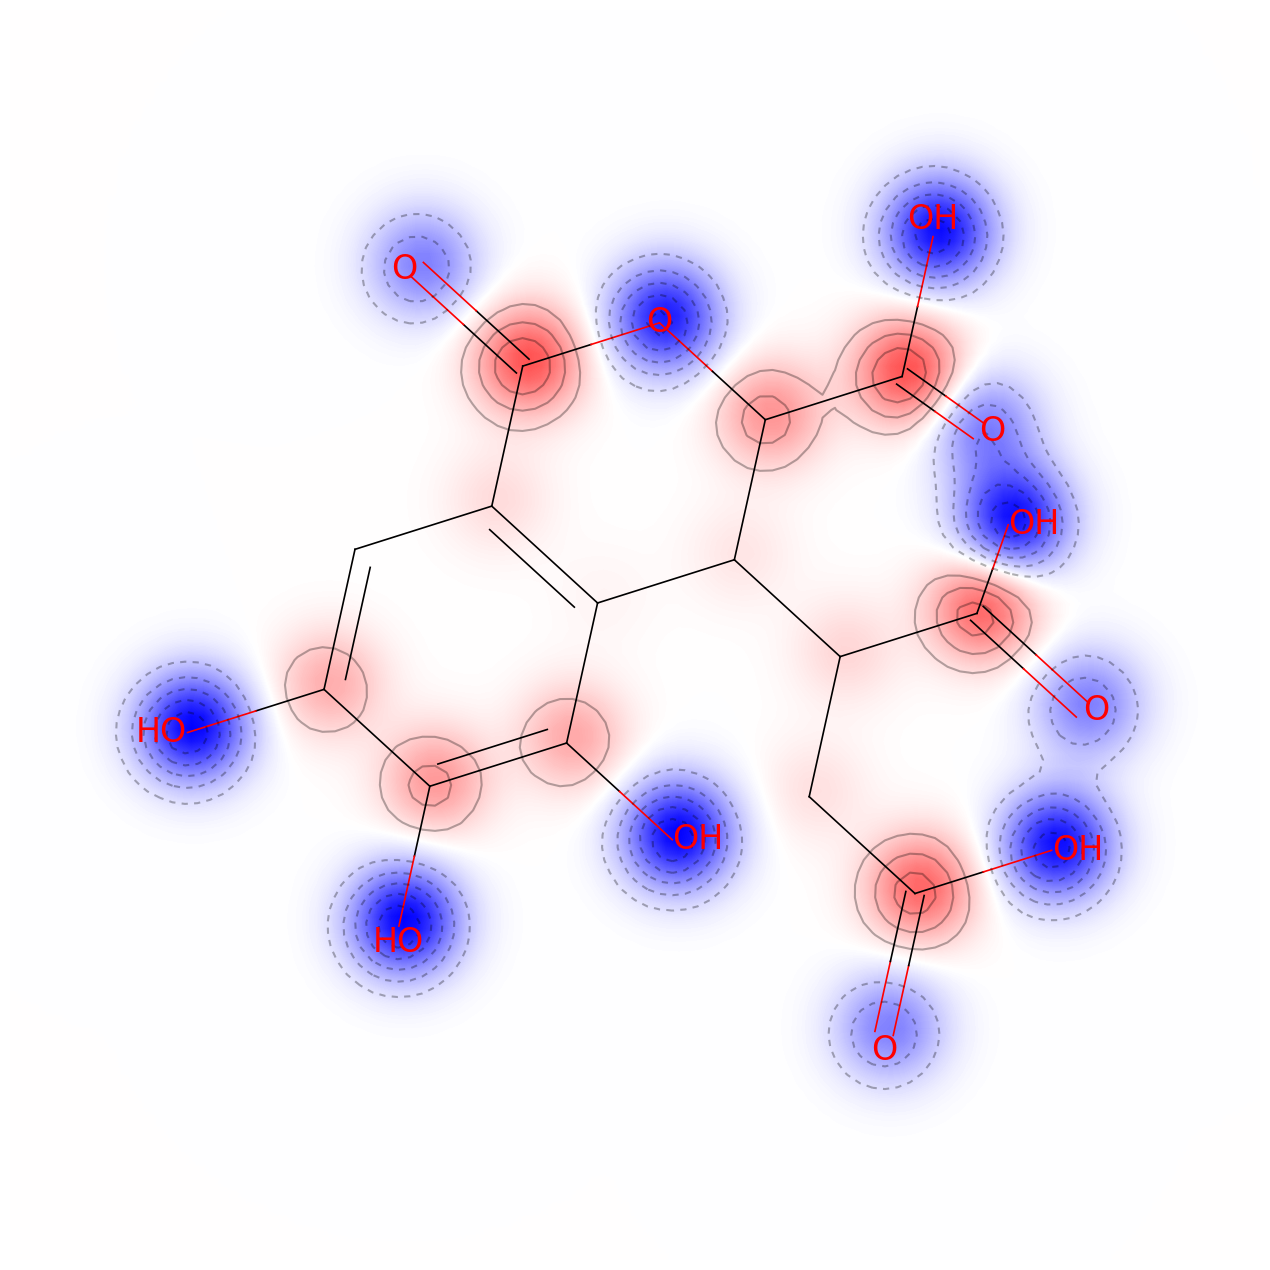

In [31]:
AllChem.ComputeGasteigerCharges(mol)
contribs = [round(mol.GetAtomWithIdx(i).GetDoubleProp('_GasteigerCharge'), 2) for i in range(mol.GetNumAtoms())]
fig = SimilarityMaps.GetSimilarityMapFromWeights(mol, contribs, contourLines=10,colorMap='bwr',alpha=0.3,
                                                          size=(500,500),dpi = 500)